In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RESULTFILE = '../apps/results.csv'
df = pd.read_csv(RESULTFILE)
df0 = df[df['model']==0].copy()
df1 = df[df['model']==1].copy()
df2 = df[df['model']==2].copy()

In [3]:
# Keep only ID, gap and objetive columns
selected_columns = ['ID', 'gap', 'objective']
df0 = df0[selected_columns]
df1 = df1[selected_columns]
df2 = df2[selected_columns]

# Multiply gap column by 100
df0['gap'] = df0['gap'] * 100
df1['gap'] = df1['gap'] * 100
df2['gap'] = df2['gap'] * 100

In [4]:

pd.set_option('display.precision', 2)

display(df1)

,ID,gap,objective
1,1,0.00,3.59e+04
4,2,0.00,2.41e+05
7,3,0.00,4.54e+05
10,4,0.00,1.74e+05
13,5,47.99,1.17e+06
16,6,88.63,2.72e+06
19,7,223.74,1.49e+05
22,8,103.27,1.81e+06
25,9,117.66,4.05e+06
28,10,0.00,6.88e+04


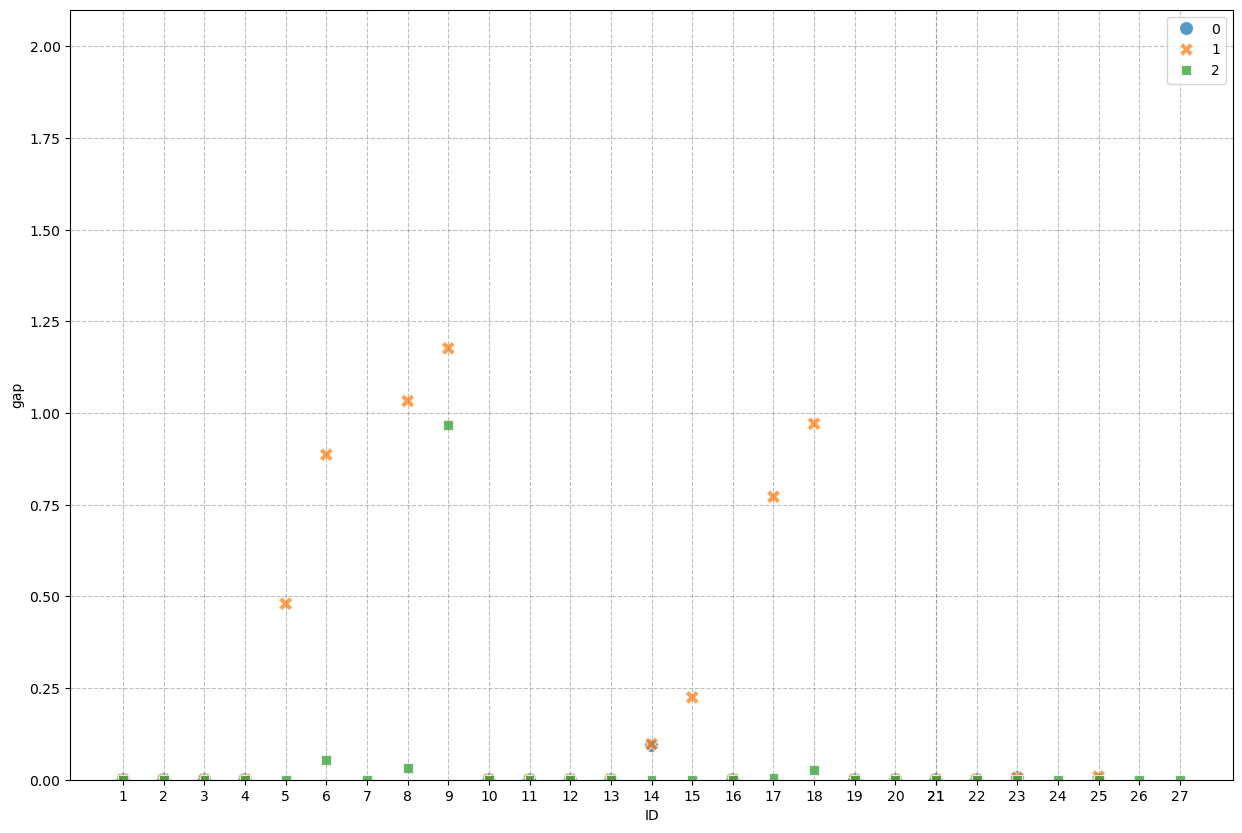

In [69]:
ID=df[df['model']==0]['ID'].values
plt.figure(figsize=(15, 10))
plt.grid(True, which='major', linestyle='--', color='gray', alpha=0.5)
# sns.lineplot(
#     x=df[df['model']==0]['ID'],
#     y=df[df['model']==0]['gap'],
#     color='tab:blue',
#     label='Model0'
# )
# sns.lineplot(
#     x=df[df['model']==1]['ID'],
#     y=df[df['model']==1]['gap'],
#     color='tab:orange',
#     label='Model1'
# )
# sns.lineplot(
#     x=df[df['model']==2]['ID'],
#     y=df[df['model']==2]['gap'],
#     color='tab:green',
#     label='Model2'
# )
# sns.lineplot(
#     data=df,
#     x='ID',
#     y='gap',
#     hue='model',
#     style='model',
#     markers=True,
#     markersize=10,
#     palette='tab10',
#     alpha=0.7
# )
sns.scatterplot(
    data=df,
    x='ID',
    y='gap',
    hue='model',
    style='model',
    markers=True,
    s=100,
    palette='tab10',
    alpha=0.75
)
plt.ylim(0,2.1)
# plt.ylim(0,0.1)
# plt.yscale('log')
plt.xticks(ID)
plt.legend()
plt.show()